In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df_train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
df_test.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
df_train_fix = df_train[["meantemp", "humidity", "wind_speed", "meanpressure"]].copy()

df_train_fix.loc[:, "temp_target"] = df_train_fix["meantemp"].shift(-1)
df_train_fix.loc[df_train_fix.index[-1], "temp_target"] = df_train_fix.loc[df_train_fix.index[-1], "meantemp"]

df_train_fix

,meantemp,humidity,wind_speed,meanpressure,temp_target
0,10.000000,84.500000,0.000000,1015.666667,7.400000
1,7.400000,92.000000,2.980000,1017.800000,7.166667
2,7.166667,87.000000,4.633333,1018.666667,8.666667
3,8.666667,71.333333,1.233333,1017.166667,6.000000
4,6.000000,86.833333,3.700000,1016.500000,7.000000
...,...,...,...,...,...
1457,17.217391,68.043478,3.547826,1015.565217,15.238095
1458,15.238095,87.857143,6.000000,1016.904762,14.095238
1459,14.095238,89.666667,6.266667,1017.904762,15.052632
1460,15.052632,87.000000,7.325000,1016.100000,10.000000


In [9]:
df_test_fix = df_test[["meantemp", "humidity", "wind_speed", "meanpressure"]].copy()

df_test_fix.loc[:, "temp_target"] = df_test_fix["meantemp"].shift(-1)
df_test_fix.loc[df_test_fix.index[-1], "temp_target"] = df_test_fix.loc[df_test_fix.index[-1], "meantemp"]

df_test_fix

,meantemp,humidity,wind_speed,meanpressure,temp_target
0,15.913043,85.869565,2.743478,59.000000,18.500000
1,18.500000,77.222222,2.894444,1018.277778,17.111111
2,17.111111,81.888889,4.016667,1018.333333,18.700000
3,18.700000,70.050000,4.545000,1015.700000,18.388889
4,18.388889,74.944444,3.300000,1014.333333,19.318182
...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,34.250000
110,34.250000,39.375000,6.962500,999.875000,32.900000
111,32.900000,40.900000,8.890000,1001.600000,32.875000
112,32.875000,27.500000,9.962500,1002.125000,32.000000


In [10]:
features = df_train_fix.drop(columns=['temp_target'])
target = df_train_fix['temp_target']
x_test = df_test_fix.drop(columns=['temp_target'])
y_test = df_test_fix['temp_target']

x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.7, random_state=42)

print(f"Total data train    : {len(df_train)}")
print(f"Train               : {len(x_train)} ({len(x_train)/len(df_train_fix)*100:.0f}%)")
print(f"Validation          : {len(x_val)} ({len(x_val)/len(df_train_fix)*100:.0f}%)")
print(f"Test                : {len(df_test_fix)}")

Total data train    : 1462
Train               : 438 (30%)
Validation          : 1024 (70%)
Test                : 114


In [11]:
scaler_x = StandardScaler()
scaler_y = MinMaxScaler()

x_train = scaler_x.fit_transform(x_train)
x_val = scaler_x.transform(x_val)
x_test = scaler_x.transform(x_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler_y.transform(y_val.values.reshape(-1, 1))

In [12]:
model = keras.Sequential([
    keras.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,761 (6.88 KB)

 Trainable params: 1,761 (6.88 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[early_stop])

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0968 - mae: 0.2566 - val_loss: 11.6821 - val_mae: 0.3760
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0902 - mae: 0.2473 - val_loss: 11.5802 - val_mae: 0.3676
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0843 - mae: 0.2385 - val_loss: 11.3788 - val_mae: 0.3586
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mae: 0.2295 - val_loss: 11.1367 - val_mae: 0.3497
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - mae: 0.2212 - val_loss: 10.9838 - val_mae: 0.3409
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mae: 0.2125 - val_loss: 10.8231 - val_mae: 0.3324
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0640 - mae: 0.2046 - val_loss: 10.6442 - val_mae: 0.3239
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mae: 0.1967 - val_loss: 10.4250 - val_mae: 0.3155
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0557

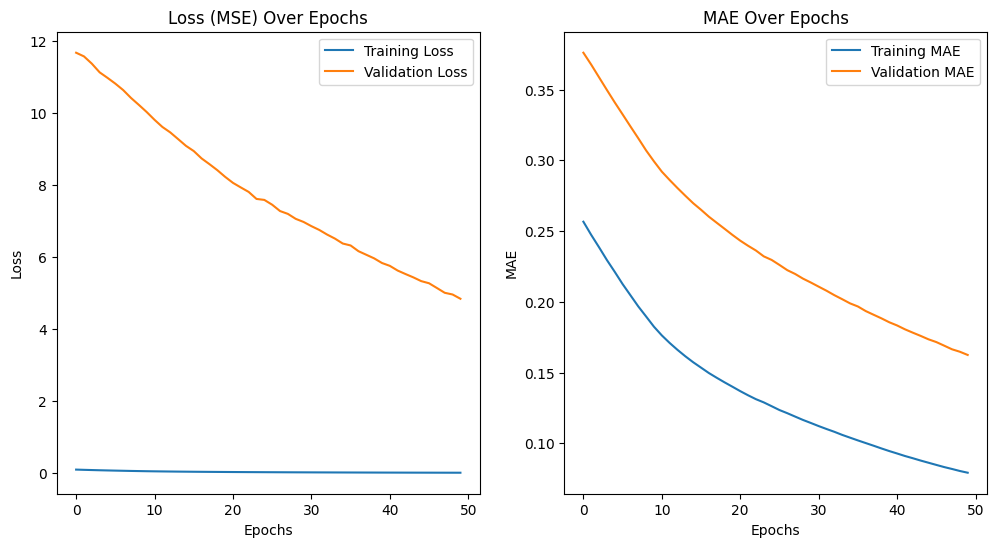

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss (MSE) Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label="Training MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.title("MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [ ]:
import joblib

joblib.dump(scaler_x, "scaler_x.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")
model.save('../models/model.keras')

In [5]:
from tensorflow.keras.models import load_model

model = load_model('../models/model.keras')

In [23]:
loss, mae = model.evaluate(x_test, scaler_y.transform(y_test.values.reshape(-1, 1)))
print("Test Loss (MSE): ", loss)
print("Test MAE: ", mae)

y_pred_scaled = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = y_test.values.reshape(-1, 1)

r2 = r2_score(y_true, y_pred)
print("Test R2:", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0183 - mae: 0.0933  
Test Loss (MSE):  0.018339376896619797
Test MAE:  0.09333726018667221
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test R2: 0.5468888723203703


In [24]:
pred = model.predict(x_test[20:40])
pred_scaled = scaler_y.inverse_transform(pred)
actual = y_test[20:40].values.reshape(-1,1)

for p, a in zip(pred_scaled, actual):
    diff = abs(a[0] - p[0])
    print(f"Prediction: {p[0]:.2f} | Actual: {a[0]:.2f} | Difference: {diff:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: 19.10 | Actual: 18.44 | Difference: 0.66
Prediction: 14.51 | Actual: 18.12 | Difference: 3.61
Prediction: 14.49 | Actual: 18.35 | Difference: 3.86
Prediction: 17.29 | Actual: 21.00 | Difference: 3.71
Prediction: 16.81 | Actual: 16.18 | Difference: 0.63
Prediction: 16.64 | Actual: 16.50 | Difference: 0.14
Prediction: 19.06 | Actual: 14.86 | Difference: 4.19
Prediction: 13.47 | Actual: 15.67 | Difference: 2.20
Prediction: 15.06 | Actual: 16.44 | Difference: 1.38
Prediction: 13.69 | Actual: 16.12 | Difference: 2.43
Prediction: 13.38 | Actual: 15.25 | Difference: 1.87
Prediction: 12.70 | Actual: 17.09 | Difference: 4.39
Prediction: 17.21 | Actual: 15.64 | Difference: 1.58
Prediction: 15.19 | Actual: 18.70 | Difference: 3.51
Prediction: 17.09 | Actual: 18.63 | Difference: 1.54
Prediction: 15.57 | Actual: 16.89 | Difference: 1.32
Prediction: 14.96 | Actual: 15.12 | Difference: 0.16
Prediction: 14.35 | Actual: 15.70 | Difference: 1.35
Predicti

In [25]:
feature_names = ["meantemp", "humidity", "wind_speed", "meanpressure"]

print("Input mean_temp, humidity, wind_speed, and meanpressure to predict temperature of the next timestamp:")
values = []
for name in feature_names:
    val = float(input(f'{name}: '))
    values.append(val)
    print(f'{name}: {val}')

input_df = pd.DataFrame([values], columns=feature_names)
input_scaled = scaler_x.transform(input_df)
pred_scaled = model.predict(input_scaled)
pred = scaler_y.inverse_transform(pred_scaled)

print(f"\nTemperature prediction of the next timestamp: {pred[0][0]:.2f}")

Input mean_temp, humidity, wind_speed, and meanpressure to predict temperature of the next timestamp:
meantemp: 18.0
humidity: 71.0
wind_speed: 5.6
meanpressure: 1019.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Temperature prediction of the next timestamp: 15.33
